In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
#Install fastai package
import sys
sys.path.append('path/to/fastai')

In [3]:
#Import packages
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix
from torchvision import transforms
from scipy import ndimage, misc
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

In [4]:
#Organize data into a zip file (done manually on local computer)
#Extra zip file
files = zf.ZipFile("garbage-classification.zip",'r')
files.extractall()
files.close()

In [5]:
#Get names of categories, which are names of folders
os.listdir(os.path.join(os.getcwd(),"garbage classification"))

['paper',
 '.DS_Store',
 'metal',
 'cardboard',
 'trash',
 'glass',
 'food',
 'plastic']

In [6]:
#Rename all the food images so that all the data have the same kind of filename
def main():
   i = 1
   path="/Users/dongxun/Desktop/Documents/Machine_Learning/Kaggle Dataset/Garbage-classification/Garbage classification/garbage-classification/food/"
   for filename in os.listdir(path):
      my_dest = "food" + str(i) + ".jpg"
      my_source =path + filename
      my_dest =path + my_dest
      os.rename(my_source, my_dest)
      i += 1
        
if __name__ == '__main__':
   main()
#This code may not work anymore since it aimed to change file names before moving files to training, validation and testing folders
#Since they are already moved in the posted dataset, renaming stuff in an empty folder causes a problem
#However, it has already achieved its purpose

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dongxun/Desktop/Documents/Machine_Learning/Kaggle Dataset/Garbage-classification/Garbage classification/garbage-classification/food/'

In [7]:
## split images into train, valid and test folders and organize them into another folder
 
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    remain = list(set(full_set)-set(train))

    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## organize file names to be the same
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## move the images into another folder
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [8]:
## organize paths to be their sets and categories
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash','food']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders
for waste_type in waste_types:
    source_folder = os.path.join('/Users/dongxun/Desktop/Documents/Machine_Learning/Kaggle Dataset/Garbage-classification/Garbage classification/garbage-classification/',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "./data/train/"+waste_type
    print(train_source_files, train_dest)
    move_files(train_source_files,train_dest)
    
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "./data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## name the new image folder as "data"
    move_files(test_source_files,"./data/test")
#This code may have some errors when rerunning it because it aims to split data into three sets
#Since they are already split on my computer, spliting something that's already split causes a problem
#However, it has already achieved its purpose

[] ./data/train/cardboard
[] ./data/train/glass
[] ./data/train/metal
[] ./data/train/paper
[] ./data/train/plastic
[] ./data/train/trash


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dongxun/Desktop/Documents/Machine_Learning/Kaggle Dataset/Garbage-classification/Garbage classification/garbage-classification/food'

target size:(3, 384, 512)

In [ ]:
! rm -rf data

In [9]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path

PosixPath('/Users/dongxun/data')

In [22]:
#make all data to have the same size
tfms = get_transforms()
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms, size = 384)

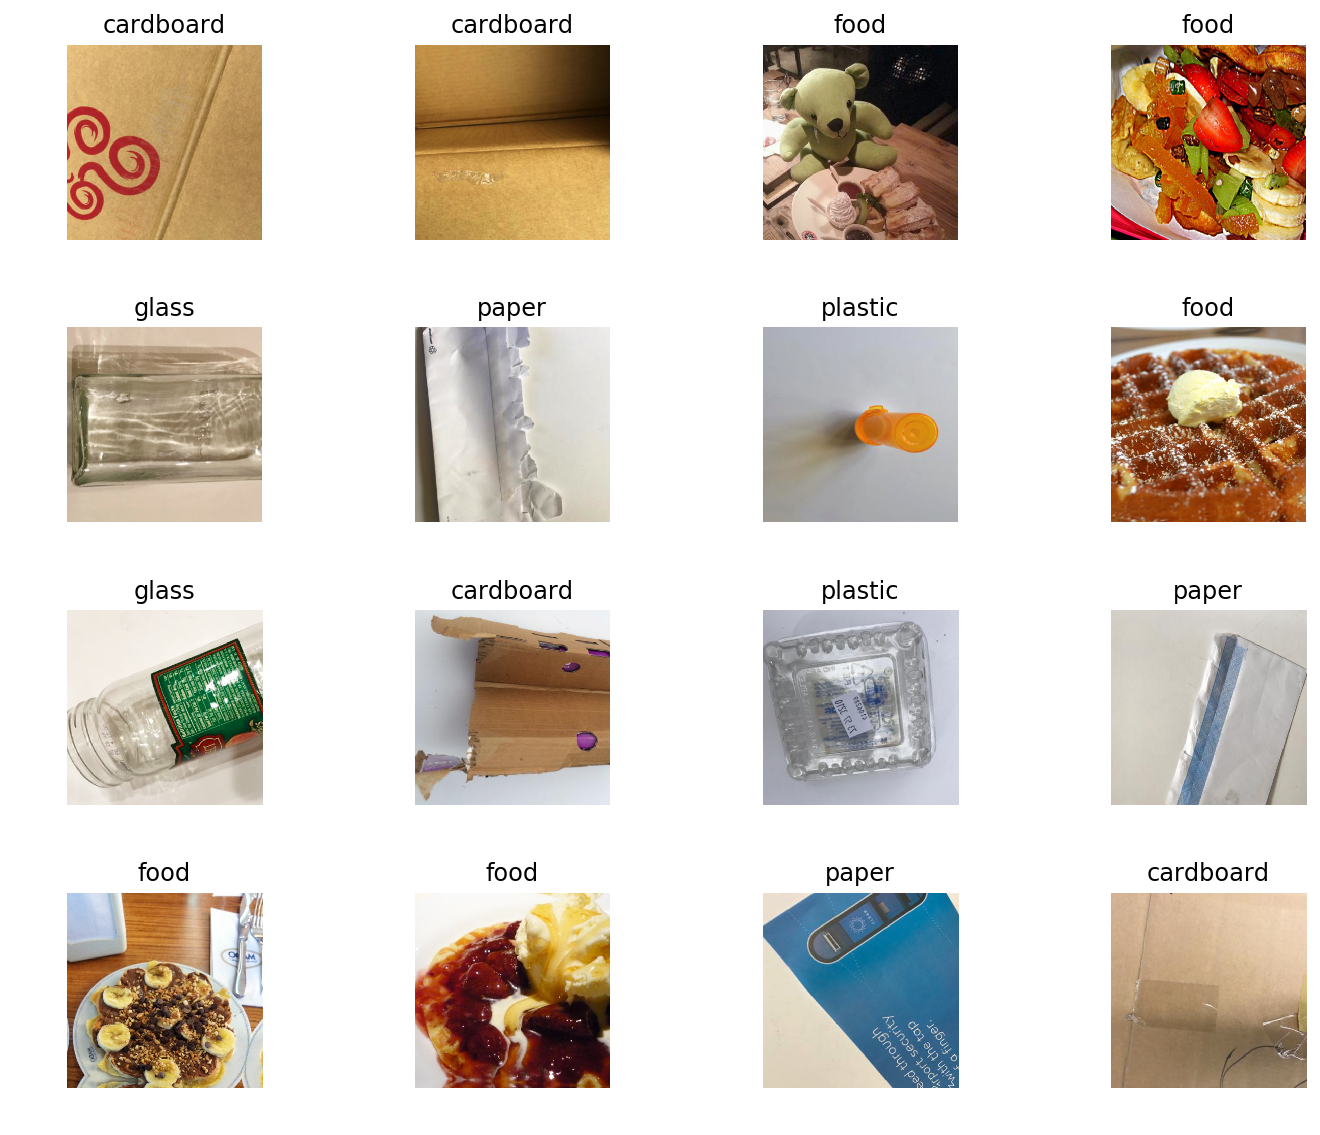

In [23]:
#Show sample data
data.show_batch(rows=4,figsize=(10,8))

In [18]:
#print data type
type(data)

fastai.vision.data.ImageDataBunch

In [22]:
#print data classes
print(data.classes)

['cardboard', 'food', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [25]:
#Fit in the model
learn = create_cnn(data,models.resnet34,metrics=error_rate)

/Users/dongxun/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [26]:
#Show model
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


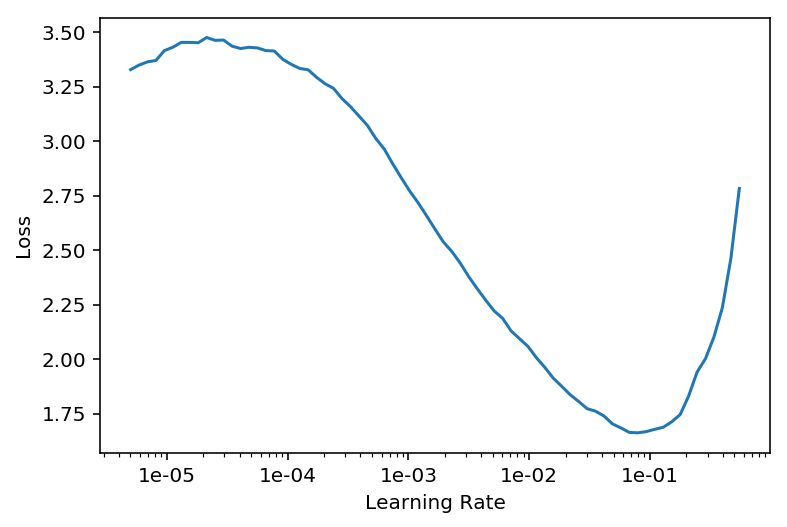

In [27]:
#Find a good learning rate
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

In [31]:
#I chose approximately the middle point of the downward slope as the learning rate
#Try if my codes work for 2 trials
learn.fit_one_cycle(2,max_lr=1e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.663030,0.556296,0.182955,43:52
1,0.987154,0.418162,0.136364,48:32


In [33]:
#Take another 2 trials
learn.fit_one_cycle(2,max_lr=1e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.478370,0.355815,0.120455,44:21
1,0.421807,0.332457,0.105682,45:45


In [34]:
#Take another 6 trials
learn.fit_one_cycle(6,max_lr=1e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.342903,0.307646,0.095455,56:38
1,0.326520,0.296378,0.090909,1:15:54
2,0.288772,0.281741,0.085227,45:36
3,0.268196,0.271686,0.089773,46:08
4,0.228149,0.262196,0.077273,42:51
5,0.199579,0.259237,0.075000,1:24:15


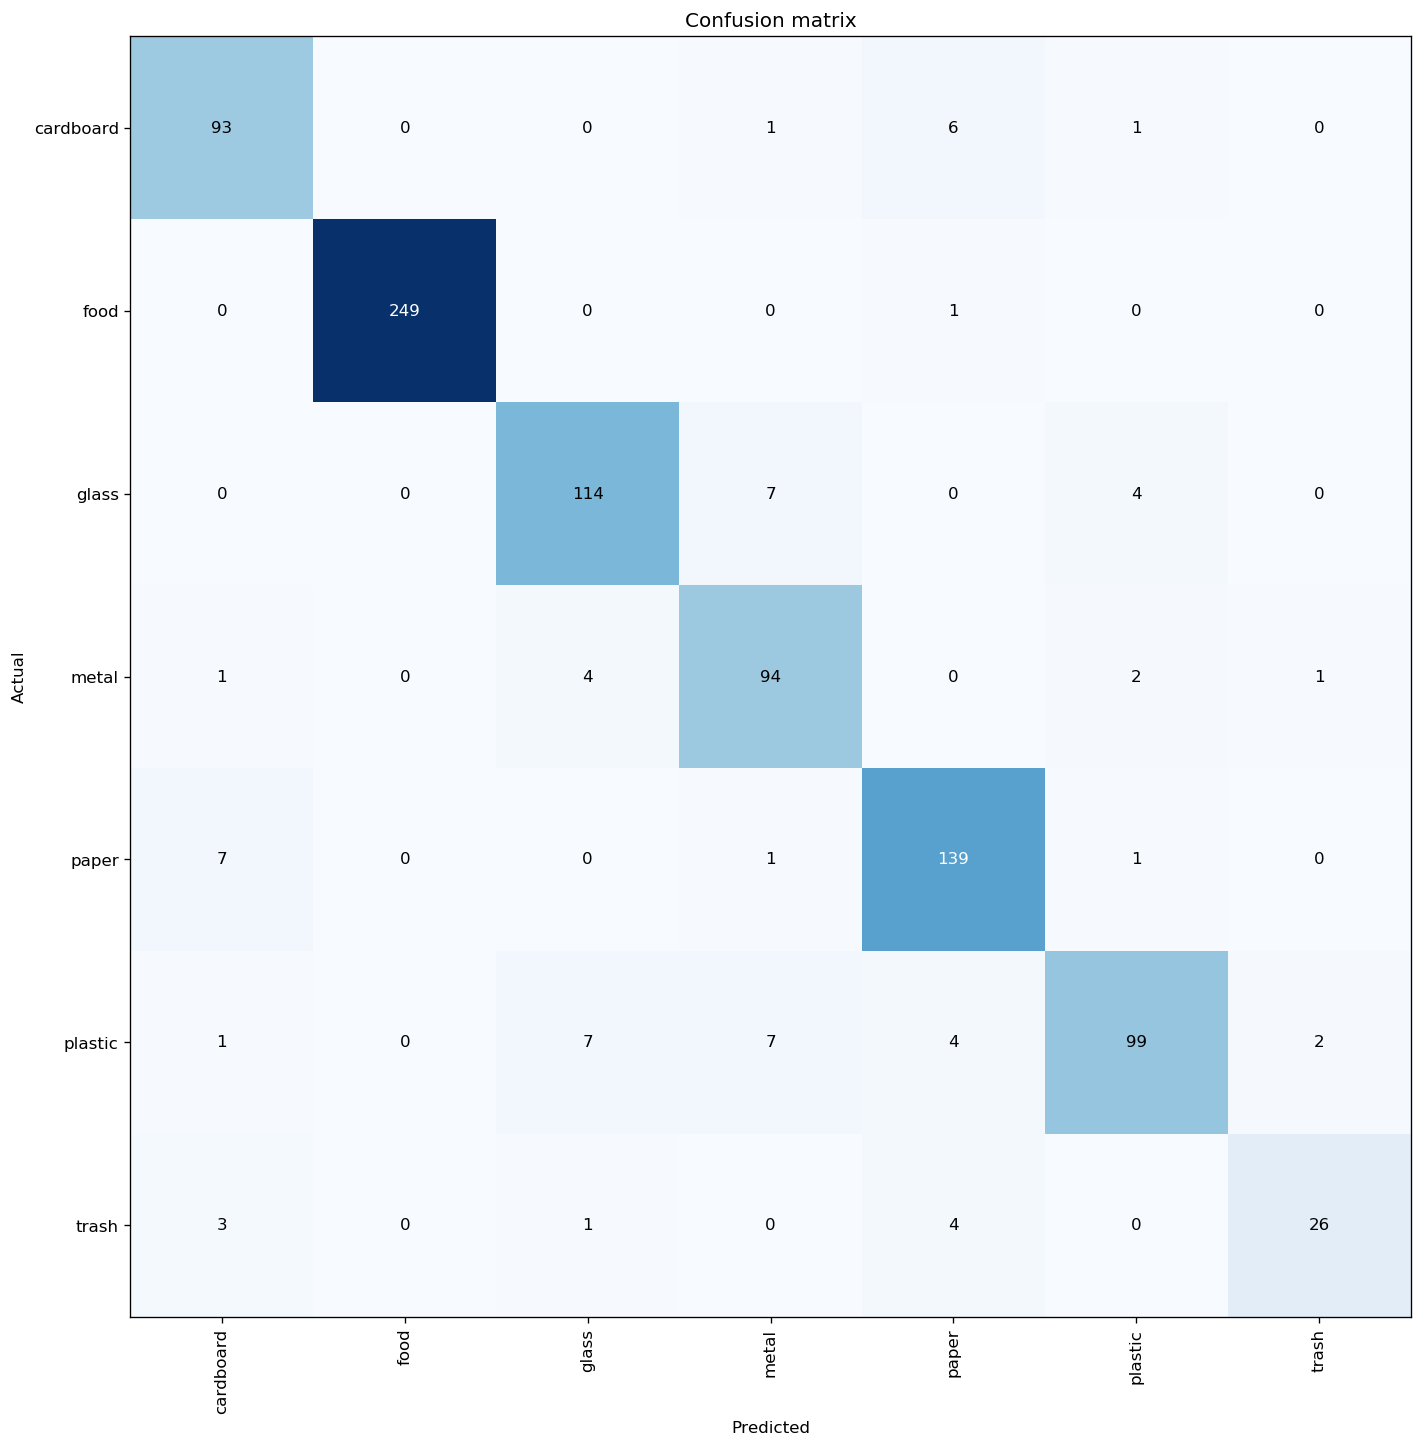

In [54]:
#Plot a confusion matrix for training set
losses,idxs = interp.top_losses()
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
#Print the most confused data
interp.most_confused(min_val=2)

[('glass', 'metal', 7),
 ('paper', 'cardboard', 7),
 ('plastic', 'glass', 7),
 ('plastic', 'metal', 7),
 ('cardboard', 'paper', 6),
 ('glass', 'plastic', 4),
 ('metal', 'glass', 4),
 ('plastic', 'paper', 4),
 ('trash', 'paper', 4),
 ('trash', 'cardboard', 3),
 ('metal', 'plastic', 2),
 ('plastic', 'trash', 2)]

In [40]:
#Fit model to the testing set
preds = learn.get_preds(ds_type=DatasetType.Test)

In [41]:
print(preds[0].shape)
preds[0]
#Possibilities of each image predicted by the codes
#The tensor has a size of 886 rows with 7 columns each

torch.Size([886, 7])


tensor([[9.9757e-01, 2.1015e-04, 2.9618e-05,  ..., 2.3940e-04, 8.4429e-05,
         1.4283e-03],
        [1.4388e-07, 8.1464e-08, 5.5300e-06,  ..., 1.7041e-07, 1.2855e-06,
         5.4091e-07],
        [4.6629e-07, 9.9997e-01, 1.0752e-07,  ..., 1.4228e-05, 5.1938e-07,
         5.7475e-06],
        ...,
        [6.4628e-06, 9.9986e-01, 8.6483e-07,  ..., 1.4005e-06, 3.3359e-06,
         1.1876e-04],
        [1.7006e-08, 1.0000e+00, 2.7630e-08,  ..., 3.9728e-08, 2.6191e-08,
         5.6716e-08],
        [7.8048e-05, 9.9978e-01, 1.1177e-04,  ..., 2.7616e-06, 1.5437e-06,
         2.7078e-05]])

In [42]:
# saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))
predicts = []
for max_idx in max_idxs:
    predicts.append(data.classes[max_idx])

In [43]:
#Print prediction results
predicts

['cardboard',
 'metal',
 'food',
 'food',
 'plastic',
 'paper',
 'plastic',
 'food',
 'trash',
 'glass',
 'food',
 'paper',
 'paper',
 'cardboard',
 'paper',
 'cardboard',
 'cardboard',
 'glass',
 'food',
 'paper',
 'plastic',
 'metal',
 'cardboard',
 'glass',
 'glass',
 'plastic',
 'glass',
 'glass',
 'glass',
 'paper',
 'metal',
 'cardboard',
 'glass',
 'food',
 'paper',
 'food',
 'plastic',
 'paper',
 'paper',
 'plastic',
 'food',
 'cardboard',
 'paper',
 'paper',
 'food',
 'paper',
 'metal',
 'glass',
 'food',
 'food',
 'plastic',
 'metal',
 'food',
 'food',
 'cardboard',
 'food',
 'food',
 'food',
 'food',
 'food',
 'plastic',
 'food',
 'paper',
 'trash',
 'paper',
 'glass',
 'food',
 'paper',
 'metal',
 'paper',
 'food',
 'food',
 'glass',
 'cardboard',
 'paper',
 'paper',
 'food',
 'paper',
 'cardboard',
 'food',
 'paper',
 'food',
 'plastic',
 'paper',
 'food',
 'metal',
 'cardboard',
 'food',
 'paper',
 'cardboard',
 'food',
 'paper',
 'metal',
 'metal',
 'cardboard',
 'plasti

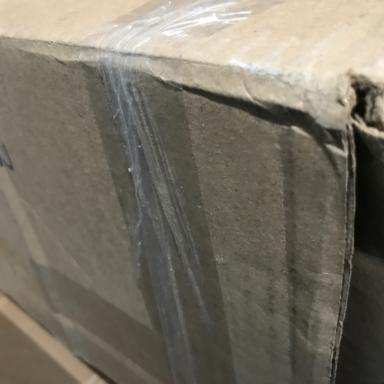

In [44]:
#Check if the first image matches the predicted result
learn.data.test_ds[0][0]

In [ ]:
# convert POSIX paths to string first
for label_path in data.test_ds.items:
    p.append(str(label_path))
    
# extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(p)):
    p[i] = pattern.search(p[i]).group(1)

In [47]:
# predicted values
print(predicts[0:5])
# actual values
print(p[0:5])
#The first five predictions all matched

['cardboard', 'metal', 'food', 'food', 'plastic']
['cardboard', 'metal', 'food', 'food', 'plastic']


In [49]:
#Create confusion matrix for calculating test accuracy
cm = confusion_matrix(p,predicts)
print(cm)

[[ 97   0   0   1   3   0   0]
 [  1 250   0   0   0   0   0]
 [  1   0 107   8   2   8   0]
 [  2   0   8  89   3   0   1]
 [  6   0   0   1 139   1   2]
 [  0   0  11   5   2  99   4]
 [  2   0   0   3   7   1  22]]


In [50]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [53]:
#Calculate testing accuracy
accuracy

0.9063205417607223